# Modules and data import

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
metadata_df = pd.read_csv("data/network_metadata.tab", sep="\t")
metadata_df.loc[:, "IMDB_id"] = metadata_df["IMDB_id"].str[2:].astype('int')
metadata_df.head()

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567","3,000","0,233",225,25
1,2,12,488478,2007,12,"4,227","0,517","2,170","3,000","0,610","6,000","0,077",102,42
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593","2,000","0,140",139,26
3,5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339","4,000","0,152",33,11
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705","1,000","0,153",164,34


In [24]:
imdb_data_df = pd.read_json("data/gexf_imdb_metadata.json", orient='index')
imdb_data_df

,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
1,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
10,"{'Budget': '$12,000,000 (estimated)', 'Opening...",{'Poole's Father': {'FATHER': 'Alan Gifford'}},[Stanley Kubrick],"[Adventure, Sci-Fi]",8.3,565235.0,62622,149.0,"[Stanley Kubrick, Arthur C. Clarke, Arthur C. ..."
100,"{'Budget': '$20,000,000 (estimated)', 'Opening...","{'Chief of Police': {'CHIEF': 'Gary Grubbs'}, ...",[Werner Herzog],"[Crime, Drama]",6.6,72110.0,1095217,122.0,[William M. Finkelstein]
101,"{'Budget': '$23,000,000 (estimated)', 'Opening...",{'Milwaukee Mom with Photo': {'MOM': 'Alex Bor...,[Terry Zwigoff],"[Comedy, Crime, Drama]",7.0,130245.0,307987,92.0,"[Glenn Ficarra, John Requa]"
102,"{'Budget': '$450,000 (estimated)'}",{'Father': {'FATHER': 'Warren Oates'}},[Terrence Malick],"[Crime, Drama]",7.8,60849.0,69762,94.0,[Terrence Malick]
...,...,...,...,...,...,...,...,...,...
92,"{'Budget': '$25,000,000 (estimated)', 'Cumulat...","{'Doctor - Vet': {'DOC': 'Hammou Aghrar'}, 'Re...",[Alejandro G. Iñárritu],[Drama],7.4,278779.0,449467,143.0,"[Guillermo Arriaga, Guillermo Arriaga, Alejand..."
93,"{'Budget': '$5,000,000 (estimated)', 'Opening ...",{'Father O'Donall': {'FATHER': 'Hugh McPhillip...,[Neal Israel],[Comedy],6.3,33885.0,86927,105.0,"[Bob Israel, Neal Israel, Pat Proft]"
97,"{'Budget': '$40,000,000 (estimated)', 'Opening...",{'Chief John Fitzgerald': {'CHIEF': 'Anthony M...,[Ron Howard],"[Crime, Drama, Mystery, Thriller]",6.7,68080.0,101393,137.0,[Gregory Widen]
98,"{'Budget': '$19,000,000 (estimated)', 'Opening...",{'Club Bartender': {'BARTENDER': 'Jimmy Franzo...,[Michael Bay],"[Action, Comedy, Crime, Thriller]",6.9,220505.0,112442,119.0,"[George Gallo, Michael Barrie, Jim Mulholland,..."


In [30]:
df = pd.merge(metadata_df, imdb_data_df, left_on="IMDB_id", right_on="movie_id")
df

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,...,Characters,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567",...,25,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
1,2,12,488478,2007,12,"4,227","0,517","2,170","3,000","0,610",...,42,"{'Budget': '$4,000,000 (estimated)', 'Opening ...",{'Dochka svidetelya': {'DOC': 'Lyubov Rudneva'}},[Nikita Mikhalkov],"[Crime, Drama, Thriller]",7.7,13437.0,488478,159.0,"[Nikita Mikhalkov, Aleksandr Novototskiy-Vlaso..."
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593",...,26,"{'Budget': '$400,000 (estimated)', 'Opening We...","{'Priest': {'PRIEST': 'Robertson Carricart'}, ...",[Michael Cuesta],[Drama],7.5,6550.0,417385,94.0,[Anthony Cipriano]
3,5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339",...,11,"{'Budget': '$18,000,000 (estimated)', 'Opening...","{'Aron's Mom': {'MOM': 'Kate Burton'}, 'Report...",[Danny Boyle],"[Biography, Drama]",7.6,333048.0,1542344,94.0,"[Danny Boyle, Simon Beaufoy, Aron Ralston]"
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705",...,34,"{'Budget': '$47,000,000 (estimated)', 'Cumulat...",{},[Ridley Scott],"[Adventure, Biography, Drama, History]",6.5,26854.0,103594,154.0,[Rose Bosch]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,910,Yes Man,1068680,2008,Yes-Man,"9,143","0,351","1,899","2,000","0,729",...,51,"{'Budget': '$70,000,000 (estimated)', 'Opening...",{'Father at Homeless Shelter': {'FATHER': 'Mik...,[Peyton Reed],"[Comedy, Romance]",6.8,319225.0,1068680,104.0,"[Nicholas Stoller, Jarrad Paul, Andrew Mogel, ..."
769,911,You Can Count on Me,203230,2000,You-Can-Count-on-Me,"11,400","0,275","1,752","3,000","0,583",...,18,"{'Budget': '$1,200,000 (estimated)', 'Opening ...",{},[Kenneth Lonergan],[Drama],7.5,26652.0,203230,111.0,[Kenneth Lonergan]
770,912,You've Got Mail,128853,1998,You've-Got-Mail,"8,769","0,374","2,131","4,000","0,727",...,36,"{'Budget': '$65,000,000 (estimated)', 'Opening...",{'T.V. Reporter': {'REPORTER': 'Nina Zoie Lam'}},[Nora Ephron],"[Comedy, Drama, Romance]",6.6,183169.0,128853,119.0,"[Miklós László, Nora Ephron, Delia Ephron]"
771,913,Youth in Revolt,403702,2009,Youth-in-Revolt,"11,000","0,287","1,916","4,000","0,640",...,34,"{'Budget': '$18,000,000 (estimated)', 'Opening...",{},[Miguel Arteta],"[Comedy, Drama, Romance]",6.4,71077.0,403702,90.0,"[Gustin Nash, C.D. Payne]"


# Exploring Graph connections

## How are genres related?
A graphical representation of genres and how they're connected.
Connections between genres are based on movie genres (i.e. given 2 movies that have genres `['Action', 'Thriller']` and `['Action', 'Comedy']`, we deduce an edge `Action -> Thriller` and `Action -> Comedy`, each with a weight of 1.
These are aggregated across all movies.

In [183]:
G = nx.Graph()
genres = df["genres"].values
unique_generes = np.unique([g for genres in genres for g in genres])
for g in unique_generes: # Add the nodes
    G.add_node(g)
    

count = dict()  # Aggregate the counts here
for g in unique_generes:
    if g not in count:
        count[g] = dict()
    for i in range(genres.shape[0]):
        for g2 in genres[i]:
            if g == g2:
                continue
            if g2 not in count[g]:
                count[g][g2] = 0
            count[g][g2] += 1

for u, d in count.items():
    for v, w in d.items():
        if u != v:
            G.add_edge(u, v, weight=w)

{'Action': {'Comedy': 238, 'Drama': 435, 'Romance': 154, 'Crime': 202, 'Thriller': 277, 'Biography': 50, 'Adventure': 131, 'History': 30, 'Fantasy': 81, 'Sci-Fi': 127, 'Mystery': 114, 'Sport': 21, 'Horror': 96, 'Film-Noir': 5, 'Music': 21, 'Animation': 15, 'Family': 31, 'Musical': 8, 'War': 25, 'Western': 10, 'Short': 2, 'Documentary': 1}, 'Adventure': {'Comedy': 238, 'Drama': 435, 'Romance': 154, 'Crime': 202, 'Thriller': 277, 'Biography': 50, 'History': 30, 'Action': 212, 'Fantasy': 81, 'Sci-Fi': 127, 'Mystery': 114, 'Sport': 21, 'Horror': 96, 'Film-Noir': 5, 'Music': 21, 'Animation': 15, 'Family': 31, 'Musical': 8, 'War': 25, 'Western': 10, 'Short': 2, 'Documentary': 1}, 'Animation': {'Comedy': 238, 'Drama': 435, 'Romance': 154, 'Crime': 202, 'Thriller': 277, 'Biography': 50, 'Adventure': 131, 'History': 30, 'Action': 212, 'Fantasy': 81, 'Sci-Fi': 127, 'Mystery': 114, 'Sport': 21, 'Horror': 96, 'Film-Noir': 5, 'Music': 21, 'Family': 31, 'Musical': 8, 'War': 25, 'Western': 10, 'Short

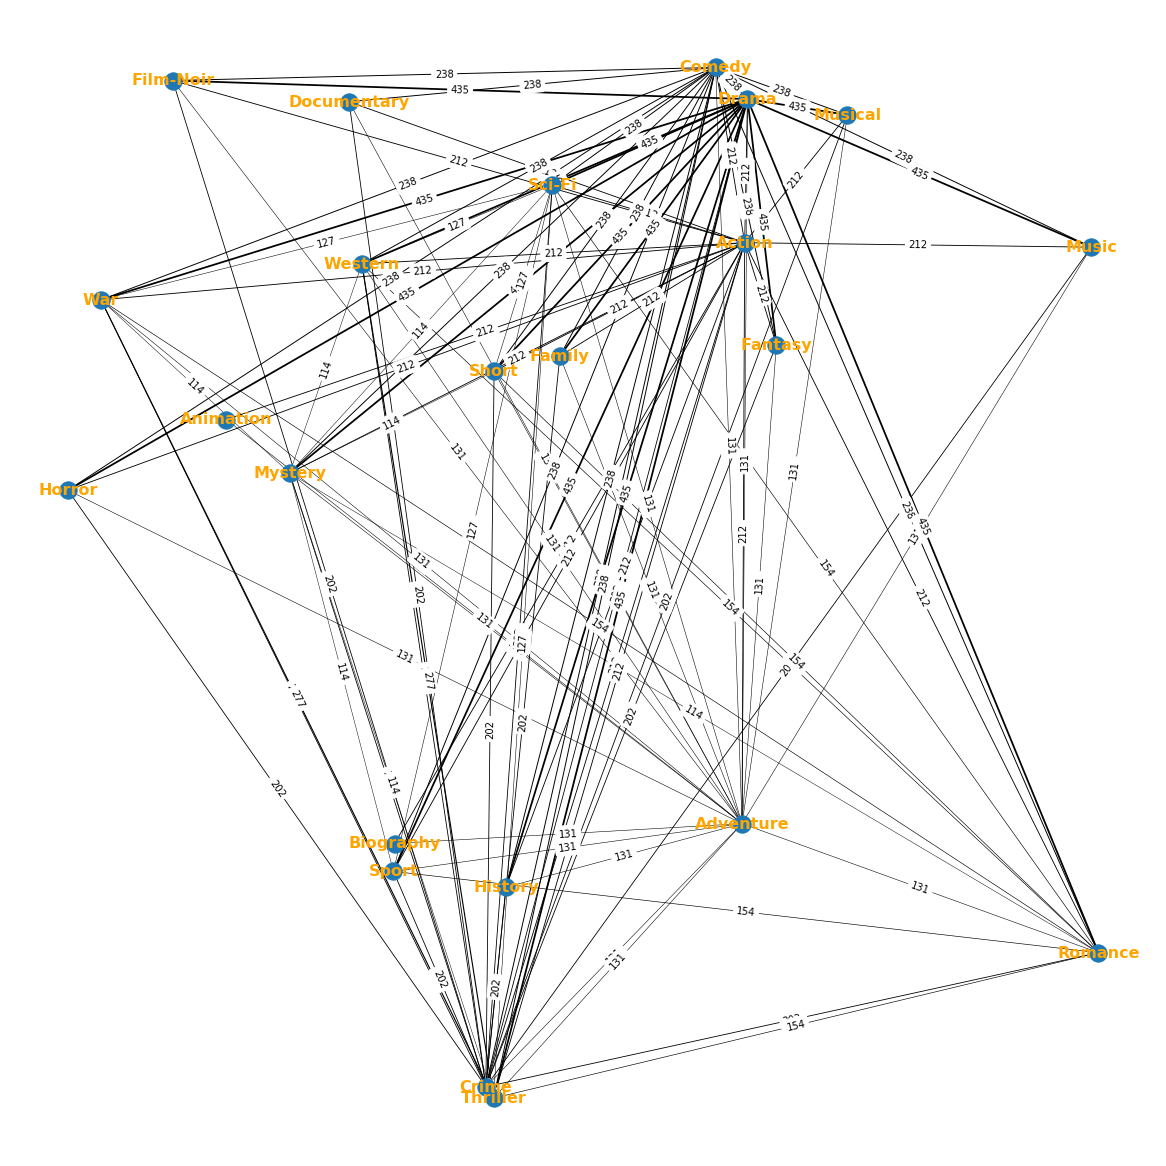

In [181]:
plt.figure(figsize=(16, 16))
pos = nx.random_layout(G)
min_weight = 100
filtered_weights = {(u, v): d["weight"] for (u, v, d) in G.edges(data=True) if d["weight"] > min_weight}
filtered_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > min_weight]
weights = np.array(list(filtered_weights.values()))
normalized_weights = 50 * weights / weights.sum()

nx.draw(G, pos=pos, edgelist=filtered_edges, font_color='orange', width=normalized_weights,
        with_labels=True, font_weight='bold', font_size=16)

nx.draw_networkx_edge_labels(G,
                             pos=pos,
                             edge_labels=filtered_weights)
plt.show()

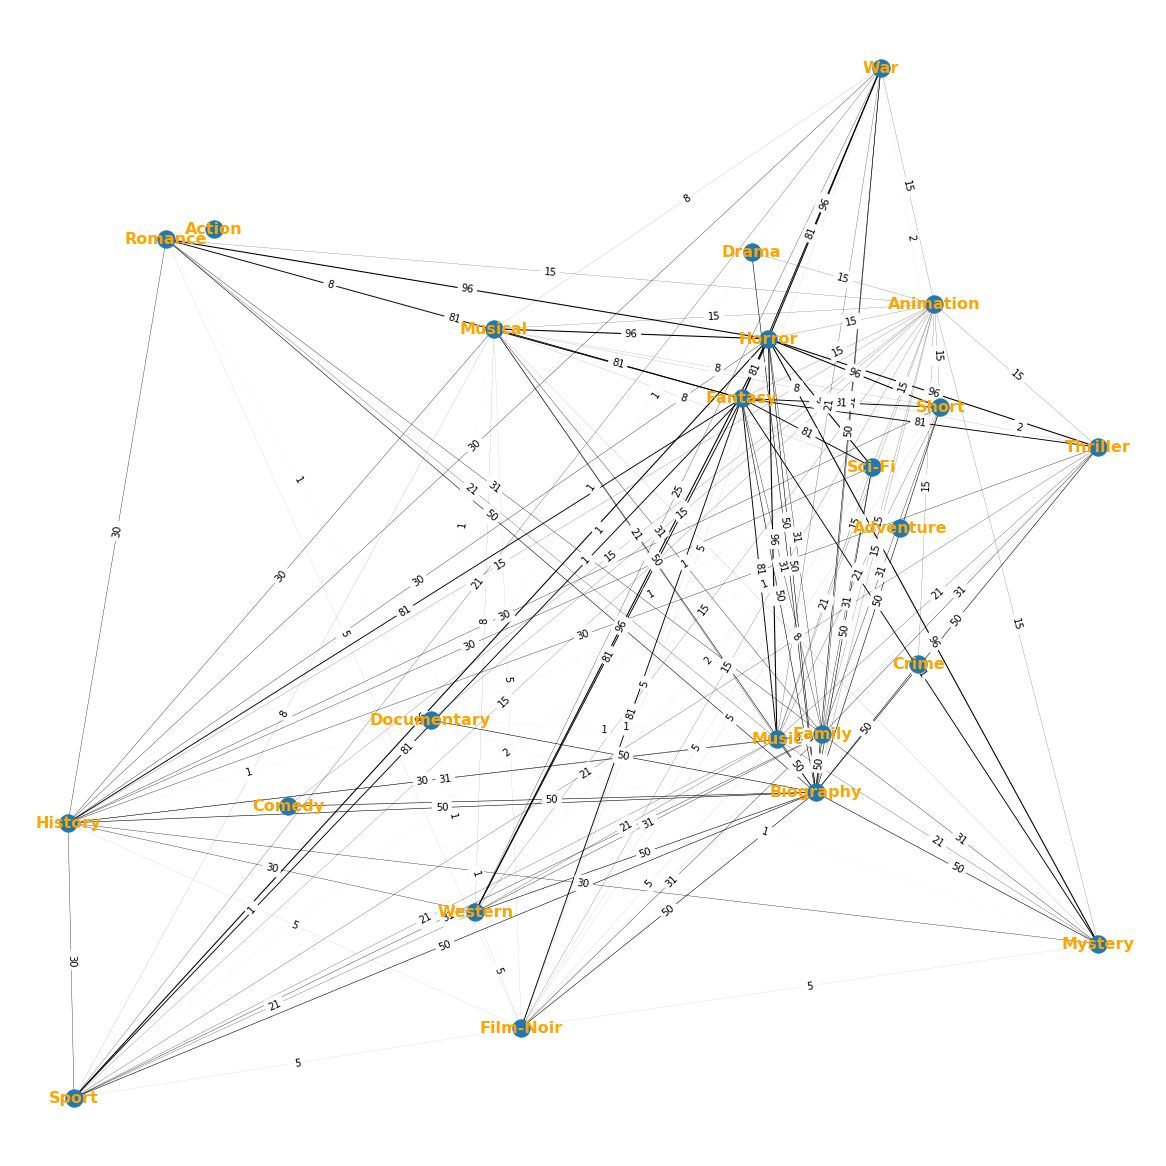

In [180]:
plt.figure(figsize=(16, 16))
pos = nx.random_layout(G)
min_weight = 100
filtered_weights = {(u, v): d["weight"] for (u, v, d) in G.edges(data=True) if d["weight"] <= min_weight}
filtered_edges = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= min_weight]
weights = np.array(list(filtered_weights.values()))
normalized_weights = 50 * weights / weights.sum()

nx.draw(G, pos=pos, edgelist=filtered_edges, font_color='orange', width=normalized_weights,
        with_labels=True, font_weight='bold', font_size=16)

nx.draw_networkx_edge_labels(G,
                             pos=pos,
                             edge_labels=filtered_weights)
plt.show()